In [2]:
NACS_DATA_FOLDER = '../processed_outputs/nacs/'
SCAN_DATA_FOLDER = '../processed_outputs/scan/'
SPLITS = ['random_split', 'length_split', 'jump_split', 'turn_left_split', 'around_right_split']

In [3]:
import pandas
from matplotlib import pyplot
from matplotlib import style
from matplotlib import gridspec

In [4]:
# Loading the generated data.
nacs_dfs = {}
for split in SPLITS:
    nacs_dfs[split] = pandas.read_csv(f'{NACS_DATA_FOLDER}{split}.csv')
scan_dfs = {}
for split in SPLITS:
    scan_dfs[split] = pandas.read_csv(f'{SCAN_DATA_FOLDER}{split}.csv')

In [5]:
# Calculating accuracies
nacs_accuracies = {}
for key in nacs_dfs:
    nacs_accuracies[key] = sum(nacs_dfs[key]['correct']) / len(nacs_dfs[key])
print(nacs_accuracies)
scan_accuracies = {}
for key in scan_dfs:
    scan_accuracies[key] = sum(scan_dfs[key]['correct']) / len(scan_dfs[key])
print(scan_accuracies)

{'random_split': 0.9882831181252989, 'length_split': 0.07908163265306123, 'jump_split': 0.3444069556189982, 'turn_left_split': 0.5670529801324503, 'around_right_split': 0.009830205540661306}
{'random_split': 0.9021999043519847, 'length_split': 0.04846938775510204, 'jump_split': 0.22748507656371658, 'turn_left_split': 0.9693708609271523, 'around_right_split': 0.41041108132260945}


In [6]:
# Load the results from the other research papers.
scan_cnn_accuracies = {'random_split': 1.0, 'jump_split': 0.6067, 'around_right_split': 0.5325}
nacs_rnn_accuracies = {'random_split': 0.998, 'length_split': 0.194, 'jump_split': 0.003, 'turn_left_split': 0.441}
scan_rnn_accuracies = {'random_split': 1.0, 'length_split': 0.096, 'jump_split': 0.019, 'turn_left_split': 0.811}

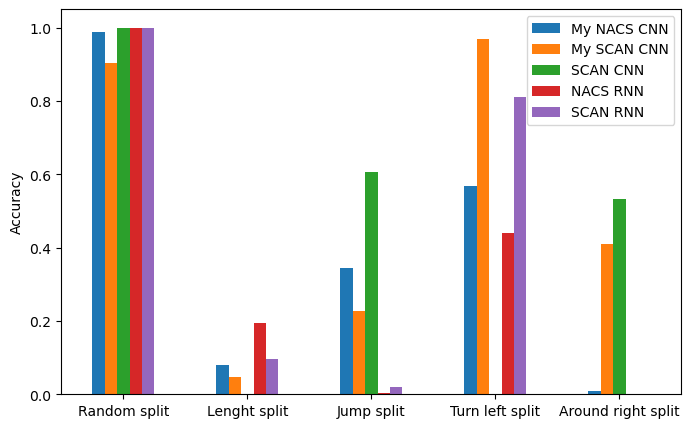

In [7]:
# Plot all accuracies
accuracies_df = pandas.DataFrame([nacs_accuracies, scan_accuracies, scan_cnn_accuracies, nacs_rnn_accuracies, scan_rnn_accuracies])
plot = accuracies_df.T.plot.bar(figsize=(8,5))
plot.legend(['My NACS CNN', 'My SCAN CNN', 'SCAN CNN', 'NACS RNN', 'SCAN RNN'])
pyplot.ylabel('Accuracy')
plot.set_xticklabels(['Random split', 'Lenght split', 'Jump split', 'Turn left split', 'Around right split'])
pyplot.xticks(rotation=0)
pyplot.savefig('accuracies.svg')

In [8]:
# Process the data from the NACS model and calculate accuracies per word.
results = {}
for split in SPLITS:
    results[split] = {}
    for keyword in ['and', 'after', 'twice', 'thrice', 'opposite', 'around', 'left', 'right', 'jump', 'run', 'walk', 'look']:
        results[split][keyword] = nacs_dfs[split][nacs_dfs[split].apply(lambda x: keyword in x['output'], axis=1)]

ds = []
for split in SPLITS:
    dictionary = {'name': split}
    for keyword in ['and', 'after', 'twice', 'thrice', 'opposite', 'around', 'left', 'right', 'jump', 'run', 'walk', 'look']:
        dictionary[keyword] = results[split][keyword]['correct'].sum() / len(results[split][keyword])
    ds.append(dictionary)

nacs_df = pandas.DataFrame(ds).set_index('name')
nacs_df

,and,after,twice,thrice,opposite,around,left,right,jump,run,walk,look
name,,,,,,,,,,,,
random_split,0.993924,0.983235,0.988741,0.996497,0.992244,0.991338,0.986397,0.986155,0.993952,0.993557,0.996222,0.992162
length_split,0.024204,0.115745,0.080145,0.128855,0.174881,0.079082,0.083803,0.086559,0.069708,0.086185,0.081115,0.078580
jump_split,0.473638,0.469607,0.540159,0.575264,0.584184,0.532847,0.550742,0.557368,0.344496,0.628083,0.630112,0.609375
turn_left_split,0.645455,0.463551,0.511013,0.550000,0.511650,0.529762,0.618231,0.471483,0.603175,0.603175,0.603175,0.626984
around_right_split,0.003937,0.014730,0.014925,0.009392,0.005284,0.000000,0.000000,0.009830,0.006074,0.006067,0.006041,0.006067


In [9]:
# Do the same as above but for SCAN

results = {}
for split in SPLITS:
    results[split] = {}
    for keyword in ['and', 'after', 'twice', 'thrice', 'opposite', 'around', 'left', 'right', 'jump', 'run', 'walk', 'look']:
        results[split][keyword] = scan_dfs[split][scan_dfs[split].apply(lambda x: keyword in x['input'], axis=1)]

ds = []
for split in SPLITS:
    dictionary = {'name': split}
    for keyword in ['and', 'after', 'twice', 'thrice', 'opposite', 'around', 'left', 'right', 'jump', 'run', 'walk', 'look']:
        dictionary[keyword] = results[split][keyword]['correct'].sum() / len(results[split][keyword])
    ds.append(dictionary)

scan_df = pandas.DataFrame(ds).set_index('name')
scan_df

,and,after,twice,thrice,opposite,around,left,right,jump,run,walk,look
name,,,,,,,,,,,,
random_split,0.886730,0.917722,0.879810,0.882152,0.903556,0.822159,0.901011,0.888928,0.907258,0.904057,0.889169,0.903984
length_split,0.048569,0.048569,0.101293,0.045795,0.103618,0.048469,0.049965,0.050317,0.044360,0.044994,0.044994,0.044994
jump_split,0.265678,0.189956,0.183774,0.247136,0.270277,0.165882,0.226987,0.221460,0.227485,0.253968,0.256236,0.252268
turn_left_split,0.961857,0.976783,0.982116,0.961252,0.994444,0.913889,0.969371,0.968519,0.972222,0.980159,0.980159,0.956349
around_right_split,0.394713,0.427867,0.327295,0.303543,0.241667,0.410411,0.310185,0.410411,0.419001,0.409665,0.416804,0.411862


In [10]:
# Combine into 1 big dataframe for visualization
df = pandas.concat([nacs_df, scan_df], keys=['NACS', 'SCAN']).swaplevel(0,1).T
df

name,random_split,length_split,jump_split,turn_left_split,around_right_split,random_split,length_split,jump_split,turn_left_split,around_right_split
,NACS,NACS,NACS,NACS,NACS,SCAN,SCAN,SCAN,SCAN,SCAN
and,0.993924,0.024204,0.473638,0.645455,0.003937,0.886730,0.048569,0.265678,0.961857,0.394713
after,0.983235,0.115745,0.469607,0.463551,0.014730,0.917722,0.048569,0.189956,0.976783,0.427867
twice,0.988741,0.080145,0.540159,0.511013,0.014925,0.879810,0.101293,0.183774,0.982116,0.327295
thrice,0.996497,0.128855,0.575264,0.550000,0.009392,0.882152,0.045795,0.247136,0.961252,0.303543
opposite,0.992244,0.174881,0.584184,0.511650,0.005284,0.903556,0.103618,0.270277,0.994444,0.241667
around,0.991338,0.079082,0.532847,0.529762,0.000000,0.822159,0.048469,0.165882,0.913889,0.410411
left,0.986397,0.083803,0.550742,0.618231,0.000000,0.901011,0.049965,0.226987,0.969371,0.310185
right,0.986155,0.086559,0.557368,0.471483,0.009830,0.888928,0.050317,0.221460,0.968519,0.410411
jump,0.993952,0.069708,0.344496,0.603175,0.006074,0.907258,0.044360,0.227485,0.972222,0.419001


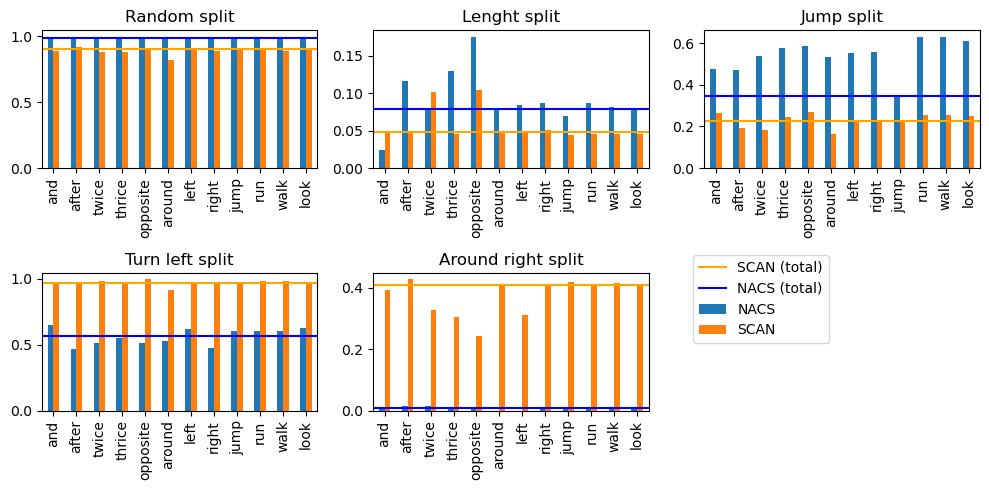

In [11]:
# Visualizing data.
fig = pyplot.figure(figsize=(10,5))
spec = gridspec.GridSpec(ncols=3, nrows=2)

split_names = ['Random split', 'Lenght split', 'Jump split', 'Turn left split', 'Around right split']

for split, split_name, size in zip(SPLITS, split_names, ([0,0], [0,1], [0,2], [1,0], [1,1])):
    ax = fig.add_subplot(spec[*size])
    plot = df[split].plot.bar(ax=ax, legend=False)
    ax.set_title(split_name)
    ax.axhline(scan_accuracies[split], color='orange', label='SCAN (total)')
    ax.axhline(nacs_accuracies[split], color='blue', label='NACS (total)')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.7, 0.3))
pyplot.tight_layout()
pyplot.savefig('relative_accuracies.svg')